In [1]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

### View Images from dataset randomly

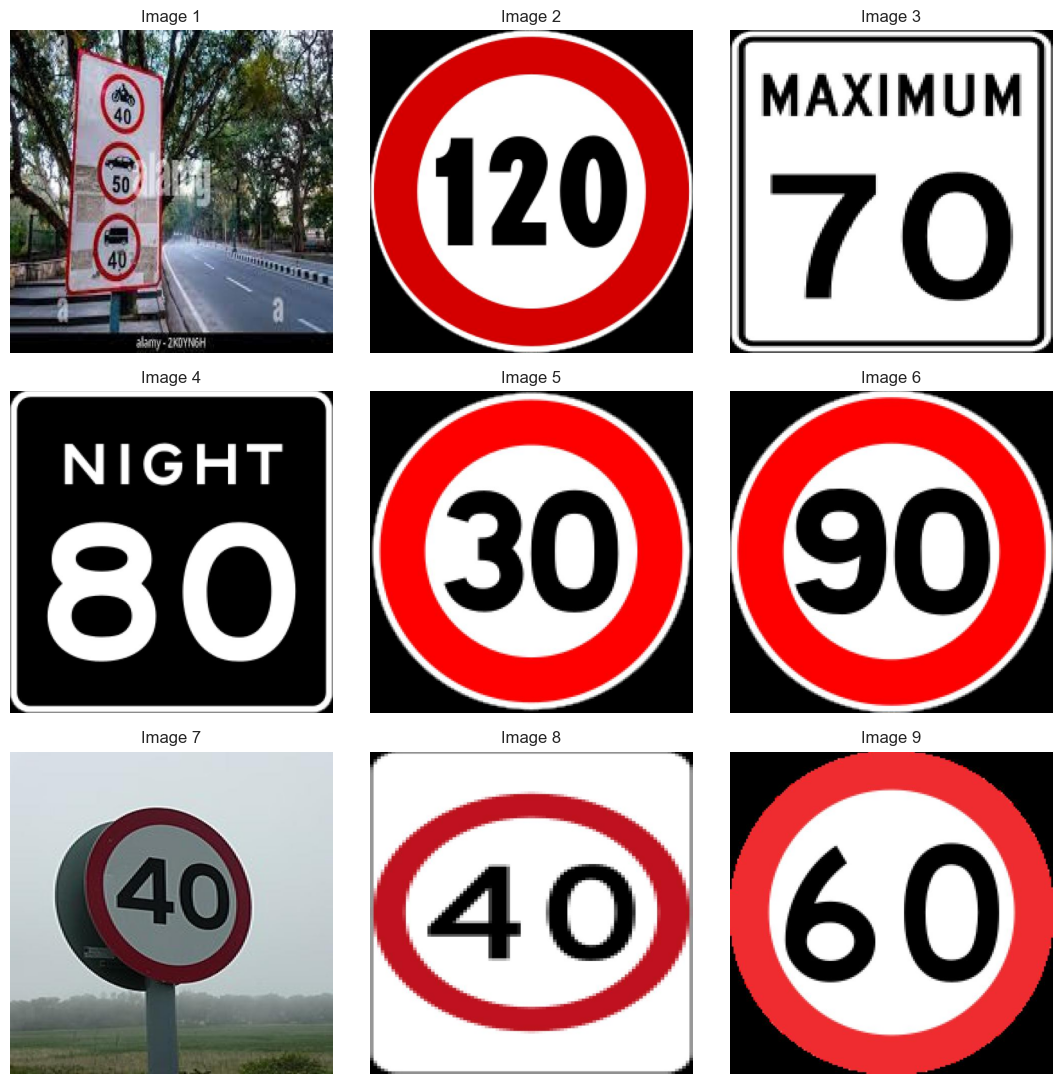

In [2]:
Image_dir = "datasets/speed-signs-detection-yolov8/train/images/"
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Dimensions of the Images

In [3]:
image = cv2.imread("datasets/speed-signs-detection-yolov8/train/images/GIVEWAY-12-_jpg.rf.154a9af6f3fc580cf6459719674ceb3c.jpg")

h, w, c = image.shape
print(f" The Image has dimensions {w}x{h} and {c} channels")

 The Image has dimensions 640x640 and 3 channels


### Predict one Image with Yolov8 Nano

100%|█████████████████████| 21.5M/21.5M [00:06<00:00, 3.38MB/s]



image 1/1 C:\Users\asrin\Desktop\bengaluru-mobility-challenge-2024\datasets\speed-signs-detection-yolov8\train\images\HUMP-23-_jpg.rf.6703d242406524ca3fe8609cbde51c39.jpg: 640x640 (no detections), 122.8ms
Speed: 2.5ms preprocess, 122.8ms inference, 58.8ms postprocess per image at shape (1, 3, 640, 640)


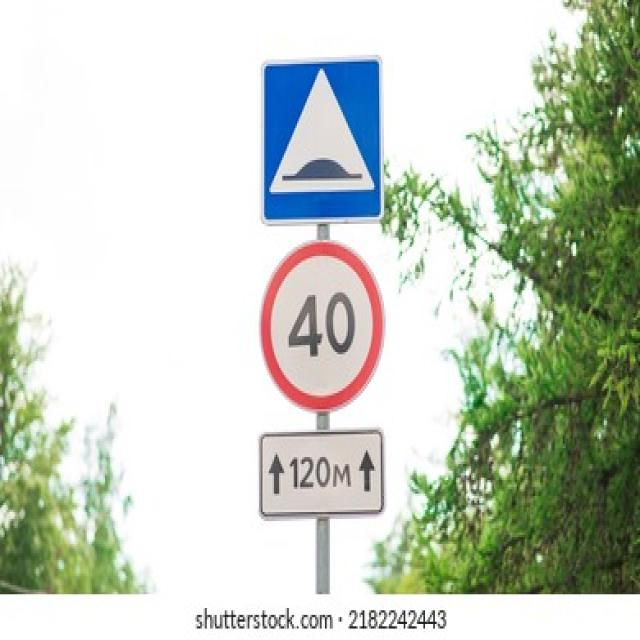

In [4]:
model = YOLO("yolov8s.pt") 


image = "datasets/speed-signs-detection-yolov8/train/images/HUMP-23-_jpg.rf.6703d242406524ca3fe8609cbde51c39.jpg"
result_predict = model.predict(source = image, imgsz=(640))


plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [2]:
model = YOLO('yolov8n.pt')

new_model = model.train(data="data.yaml",epochs = 30, batch = 16, lr0=0.0001, dropout= 0.15,device = 0,imgsz = 640)

New https://pypi.org/project/ultralytics/8.2.59 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.58  Python-3.10.11 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce MX230, 2048MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning C:\Users\asrin\Desktop\bengaluru-mobility-chall


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\asrin\Desktop\bengaluru-mobility-challen


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.35G      1.495      4.239      1.819        
                 Class     Images  Instances      Box(P        

                   all        137        137     0.0687      0.208     0.0601     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.32G      1.073      3.575      1.463        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.573      0.142      0.136     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.32G      1.056      3.176      1.461        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.115      0.496      0.185      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.32G      1.075      2.828      1.465        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.157      0.652      0.352      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.32G       1.07      2.614       1.44        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.367      0.594      0.519      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.32G      1.032      2.524       1.43        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.289      0.695      0.491      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.32G      1.029      2.438      1.407        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.533      0.655      0.648      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.32G     0.9821      2.276      1.358        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.605      0.694       0.73       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.32G     0.9859      2.117      1.379        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.535      0.648      0.763      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.32G     0.9591      2.056      1.344        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.586       0.77      0.737      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.32G     0.9396      1.908      1.331        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.761      0.848      0.879      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.32G      0.951       1.89      1.319        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.826      0.775      0.871      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.32G     0.8851      1.796      1.286        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.817      0.732      0.861      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.32G     0.8937      1.721       1.28        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.806       0.74      0.827      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.32G     0.8412      1.639      1.257        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.823      0.894      0.919      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.32G     0.8957      1.699      1.304        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.825      0.856      0.863      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.32G     0.8554       1.61      1.257        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.865       0.83      0.905       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.32G     0.8384      1.529      1.252        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.874      0.851      0.899      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.32G     0.8665      1.547      1.265        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.968      0.906      0.961      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.32G     0.8226      1.457      1.237        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.915      0.832      0.914      0.522


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.32G     0.8455      1.564      1.412        
                 Class     Images  Instances      Box(P        

                   all        137        137       0.88      0.854      0.897      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.32G     0.7813      1.404      1.345        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.834      0.866      0.857      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.32G     0.7409      1.321      1.288        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.932      0.956       0.97      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.32G     0.7787      1.322      1.321        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.855      0.914      0.901      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.32G     0.7411      1.248      1.314        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.893      0.923      0.908      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.32G     0.7313      1.237      1.298        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.901      0.917      0.921      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.32G      0.718      1.197      1.262        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.931      0.941       0.95      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.32G     0.7084      1.182      1.254        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.908       0.95       0.95      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.32G     0.6789      1.156      1.255        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.899      0.918      0.943      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.32G     0.6765      1.111      1.257        
                 Class     Images  Instances      Box(P        

                   all        137        137      0.919      0.921      0.949       0.54



30 epochs completed in 0.980 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.58  Python-3.10.11 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce MX230, 2048MiB)
Model summary (fused): 168 layers, 3,008,963 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P        


                   all        137        137      0.931      0.959       0.97      0.589
     Speed Limit -100-         10         10      0.951          1      0.995       0.49
     Speed Limit -120-          8          8          1       0.99      0.995      0.525
      Speed Limit -60-         31         31      0.907      0.942      0.946      0.585
      Speed Limit -70-         17         17          1      0.964      0.995      0.621
      Speed Limit -80-         21         21          1      0.895      0.957      0.584
      Speed Limit -90-         12         12      0.814      0.917      0.914      0.556
        Speed Limit 30         28         28      0.853      0.964      0.962      0.603
      Speed limit -40-         10         10      0.925          1      0.995      0.752
Speed: 1.2ms preprocess, 22.2ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs\detect\train3


### Test Model on Unseen Video


In [ ]:
import cv2

VIDEOS_DIR = "datasets/videos/"
video_name = 'traffic_test.avi'
video_path = os.path.join(VIDEOS_DIR, video_name)

VIDEOS_OUT_DIR = "videos_out"
video_path_out = os.path.join(VIDEOS_OUT_DIR,'{}_out.mp4'.format(video_name[:-4]))

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))


# Load a model
model = YOLO("best.pt")  

threshold = 0.1

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 74.5ms
Speed: 3.0ms preprocess, 74.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 20.0ms
Speed: 5.0ms preprocess, 20.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 19.9ms
Speed: 3.0ms preprocess, 19.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 19.1ms
Speed: 2.4ms preprocess, 19.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 21.8ms
Speed: 3.2ms preprocess, 21.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.0ms
Speed: 4.0ms preprocess, 18.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 20.1ms
Speed: 2.7ms preprocess, 20.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 19.5ms
Speed: 3.0ms preprocess, 19.5ms i